# MNIST / PCA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.io as sio
%matplotlib inline

In [2]:
mnist = sio.loadmat("data/mnist.mat")
X = mnist['X']

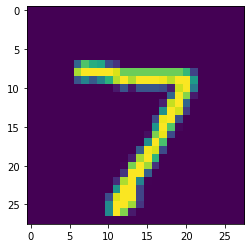

In [3]:
plt.imshow(X[:, :, 0])

In [4]:
import sklearn as sl
import sklearn.decomposition as skd

In [5]:
stacked = X.reshape((X.shape[0] * X.shape[1], X.shape[2]))

In [6]:
stacked.shape

(784, 10000)

In [7]:
labels = mnist['labels'].reshape(10000)
labels[0]

7

In [8]:
pca = skd.pca.PCA(n_components=2)
Y = pca.fit(np.transpose(stacked))

In [9]:
embedded = Y.components_ @ stacked
embedded.shape

(2, 10000)

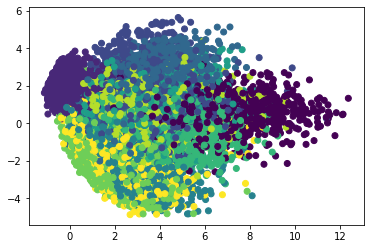

In [10]:
plt.scatter(embedded[0, :], embedded[1, :], c=labels)

In [11]:
import sklearn.discriminant_analysis as sda

## LDA

/home/jw/.conda/envs/siam/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


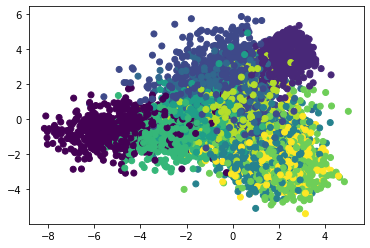

In [100]:
lda = sda.LinearDiscriminantAnalysis(n_components = 2)
Y = lda.fit_transform(np.transpose(stacked), labels)
plt.scatter(Y[:, 0], Y[:, 1], c=labels)

## LDA + PCA (2)

(10000, 9)


/home/jw/.conda/envs/siam/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


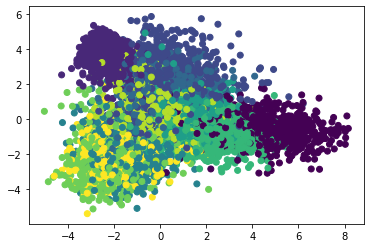

In [367]:
lda = sda.LinearDiscriminantAnalysis(n_components = 9)
Y = lda.fit_transform(np.transpose(stacked), labels)
print(Y.shape)
pca.fit(Y)
Z = pca.components_ @ np.transpose(Y)
plt.scatter(Z[0, :], Z[1, :], c=labels)

## SVD

A is of size $m \times n$, where $m \approx 750, n \approx 10000$.

$$A = U_r \Sigma_r V_r^T,$$

$$U_r = m \times r$$
$$\Sigma = r \times r$$
$$V_r = n \times r$$

To get $r \times n$

we use $U_r^T A$ 

In [14]:
U, S, VT = sp.linalg.svd(stacked)

In [15]:
SX = np.transpose(U[:,:2]) @ stacked

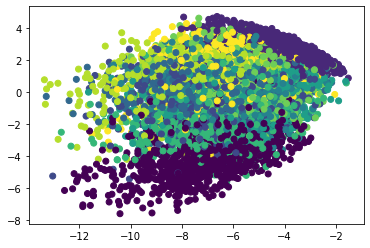

In [16]:
plt.scatter(SX[0, :], SX[1, :], c=labels)

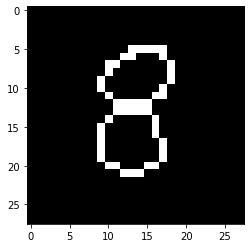

In [394]:
import imageio
own = imageio.imread("data/8.png")
test = own[:, :, 0].flatten()
test.shape
test = np.linalg.norm(stacked[:, 0]) / np.linalg.norm(test) * test

outcome = np.transpose(U[:,:2]) @ test
outcome
plt.imshow(own)

In [320]:
lda.predict([test])

array([8], dtype=uint8)

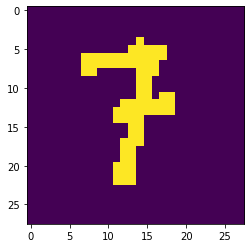

In [323]:
sergio = imageio.imread("data/7.png")
sergio = sergio[:, :, 0].flatten()
sergio = np.linalg.norm(stacked[:, 0]) / np.linalg.norm(sergio) * sergio
lda.predict([sergio])
plt.imshow(sergio.reshape(28, 28))

In [20]:
predictions = lda.predict(np.transpose(stacked))
correct = predictions == labels
mislabels = np.argwhere(correct == False).flatten()

for i in mislabels:
    print(i, labels[i], predictions[i])

8 5 4
11 6 8
33 4 5
38 2 1
43 2 1
47 2 6
63 3 2
66 6 2
73 9 7
80 7 9
111 7 1
119 2 8
124 7 9
167 5 3
195 3 9
211 5 7
217 6 5
233 8 7
241 9 8
256 2 1
259 6 0
261 5 1
275 4 9
290 8 4
299 8 3
300 4 1
307 7 9
318 2 3
320 9 1
321 2 7
333 5 8
336 9 4
340 5 3
349 3 9
352 5 0
358 7 9
362 2 7
363 2 1
366 6 1
389 9 7
398 4 9
403 8 5
412 5 3
417 9 7
443 0 8
444 2 8
445 6 0
448 9 8
449 3 5
456 2 5
460 5 7
464 3 7
479 9 3
502 5 3
507 3 5
508 6 8
511 4 8
515 3 8
516 2 6
523 1 4
530 9 4
531 3 6
550 7 9
551 7 1
565 4 9
566 6 8
569 3 5
578 3 8
591 8 3
593 9 7
605 7 9
613 2 8
617 7 4
619 1 8
624 2 1
627 9 4
628 3 9
629 2 6
638 5 7
658 7 4
659 2 8
661 0 8
667 7 1
674 5 3
685 8 1
688 6 8
691 8 4
692 5 7
717 0 4
720 5 8
726 7 5
728 2 8
740 4 9
741 2 8
751 5 3
760 4 9
791 5 9
800 8 5
839 8 3
844 8 3
857 5 3
870 6 8
877 8 2
881 4 9
898 7 1
919 2 1
924 2 3
930 7 1
938 3 5
939 2 8
944 3 8
946 7 9
947 8 4
950 7 9
956 1 6
965 6 0
975 2 3
976 3 8
982 3 8
1000 9 7
1014 6 5
1022 5 9
1032 5 8
1039 7 9
1046 5 8
1050 

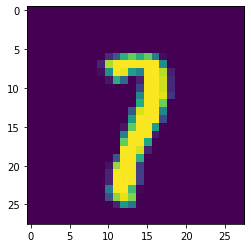

In [21]:
plt.imshow(X[:, :, 111])

## LDA implementation

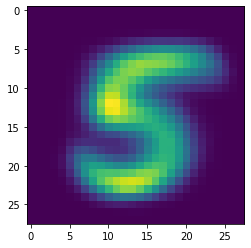

In [120]:
# scatter matrices: find cluster centroids, and global centroid
def find_centroid(i):
    return np.apply_along_axis(np.average, 1, stacked[:,labels == i])
vcentroid = np.vectorize(find_centroid)
centroids = np.array(list(map(find_centroid, range(0, 10))))
plt.imshow(centroids[5].reshape(28, 28))

global_centroid = np.apply_along_axis(np.average, 1, stacked)

33960.46675023562

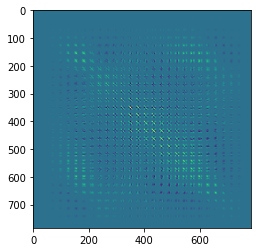

In [242]:
pixels = len(global_centroid)
Sb = np.zeros((pixels, pixels))
for i in range(0, 10):
    d = (centroids[i] - global_centroid).reshape((pixels, 1))
    Sb += stacked[:, labels == i].shape[1] * (d * np.transpose(d))
plt.imshow(Sb)
np.linalg.norm(Sb, ord=2)

In [243]:
Sw = np.zeros((pixels, pixels))
for i in range(0, 10):
    xs = np.transpose(stacked[:, labels == i])
    for x in xs:
        d = (x - centroids[i]).reshape((pixels, 1))
        Sw += (d @ np.transpose(d))

In [307]:
w, vr = sp.linalg.eig(Sb, Sw + 1e-5 * np.eye(pixels), right=True)

In [311]:
stacked[:, labels == i].shape[1]

1009

In [312]:
largest = np.argsort(w)[::-1][:9]
G = np.take(vr, largest, 1)

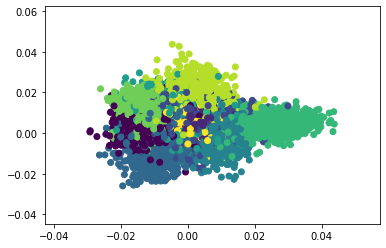

In [313]:
embed = np.transpose(np.transpose(G) @ stacked)
pca.fit(embed)
Z = pca.components_ @ np.transpose(embed)
plt.scatter(Z[0, :], Z[1, :], c=labels)

In [277]:
largest = np.sort(w)[::-1][:9]
print(largest)

[4.21759693+0.j 3.81199637+0.j 3.10662977+0.j 2.07025266+0.j
 1.75879415+0.j 1.3143528 +0.j 0.99703952+0.j 0.68976134+0.j
 0.55634854+0.j]


# NMF

In [264]:
T = sio.loadmat("data/vis_data.mat")
dic = T['dic'].flatten()
dic = list(map(lambda x: x[0], dic))

In [265]:
X = T['X']

In [329]:
def perform_nmf(k, n):
    nmf = skd.NMF(n_components=k, solver='mu')
    W = nmf.fit_transform(X)
    H = nmf.components_
    topics_top = np.apply_along_axis(lambda x: x.argsort()[-n:][::-1], 0, W)
    topics = np.apply_along_axis(lambda x: np.take(dic, x), 0, topics_top)
    return W, H, np.transpose(topics)

In [385]:
H, W, topics = perform_nmf(3, 3)
topics

array([['visual', 'data', 'user'],
       ['surfac', 'point', 'figur'],
       ['node', 'graph', 'edg']], dtype='<U39')

In [386]:
list(topics[H[15, :].argmax()])

['visual', 'data', 'user']

In [387]:
print(dic[-1])

zzstructur


In [388]:
H.shape

(24928, 3)

In [389]:
?skd.NMF

In [390]:
H[15, :]

array([0.00116684, 0.00059608, 0.00062648])

In [391]:
H

array([[2.79973650e-03, 1.97937414e-03, 4.96732209e-05],
       [2.15186392e-19, 1.71673515e-02, 6.05774027e-03],
       [2.50529754e-05, 2.92831210e-03, 5.14153452e-09],
       ...,
       [1.18777911e-03, 3.69967639e-03, 0.00000000e+00],
       [5.15962184e-04, 1.22552748e-02, 0.00000000e+00],
       [1.40207339e-16, 3.93049749e-18, 9.88337918e-03]])

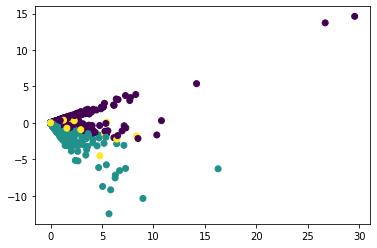

In [392]:
pca = skd.pca.PCA(n_components=2)
Y = pca.fit(H)
Z = pca.components_ @ np.transpose(H)
plt.scatter(Z[0, :], Z[1, :], c=np.apply_along_axis(np.argmax, 1, H))

## Hierarchical NMF

In [ ]:
def hnmf(leafs):
    nmf = skd.NMF(n_components=k, solver='mu')
    W = nmf.fit_transform(X)
    H = nmf.components_


In [395]:
?skd.NMF